# 1、Keras API学习
两种模型：Sequential,Functional

In [3]:
import platform
import tensorflow as tf
import keras
print(platform.platform())
print(tf.__version__)
print(keras.__version__)


Windows-10-10.0.17134-SP0
1.13.1
2.2.4


In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mping
import numpy as np
from IPython.display import Image

## 1.1 Sequential模型

In [5]:
from keras.models import Sequential
from keras.layers import Dense

In [6]:
#构建模型
model = Sequential([Dense(2,input_shape=(1,)),Dense(1)])


Instructions for updating:
Colocations handled automatically by placer.


In [7]:
del model

In [8]:
#在模型中，逐层添加
model = Sequential()
model.add(Dense(2,input_shape=(1,)))
model.add(Dense(1))

In [9]:
del model

## 1.2Functional构建模型 
相比Sequential模型，这是一种更灵活的模型构建方式。这种模型的灵活主要表现在：
定义多个输入；
定义多个输出；
定义共享图层；
可以定义动态的非周期的模型；
### 1.2.1定义输入层

In [10]:
from keras.layers import Input
from keras.models import Model

mnist_input = Input(shape=(784,))

### 1.2.2定义不同的连接层

In [11]:
hidden = Dense(512)(mnist_input)

### 1.2.3 添加到模型

In [12]:
model = Model(inputs = mnist_input,outputs = hidden)


## 1.3标准的网络模型
### 1.3.1 多层感知器

In [13]:
#from keras models import Model
#from keras.layers import Input,Dense
from keras.utils import plot_model

In [14]:
#定义输入层
mnist_input = Input(shape=(784,),name='input')
#定义隐藏层
hidden1 = Dense(512,activation='relu',name = 'hidden1')(mnist_input)
hidden2 = Dense(216,activation='relu',name='hidden2')(hidden1)
hidden3 = Dense(128,activation='relu',name='hidden3')(hidden2)
#定义输出层
out_put = Dense(10,activation='softmax',name='output')(hidden3)
#定义函数式模型
model = Model(inputs = mnist_input, outputs = out_put)

In [15]:
#打印显示网络结构
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 784)               0         
_________________________________________________________________
hidden1 (Dense)              (None, 512)               401920    
_________________________________________________________________
hidden2 (Dense)              (None, 216)               110808    
_________________________________________________________________
hidden3 (Dense)              (None, 128)               27776     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 541,794
Trainable params: 541,794
Non-trainable params: 0
_________________________________________________________________


In [16]:
#生成网络拓扑图并保存
plot_model(model,to_file = 'multilayer_perceptron_graph.png')

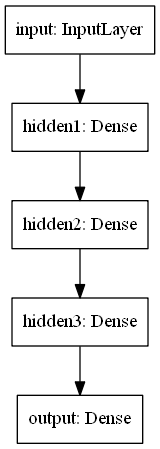

In [17]:
#展示模型拓扑图
Image('multilayer_perceptron_graph.png')

### 1.3.2卷积神经网络CNN
本例子，用于图像分类。
输入28 * 28
两个卷积层，两个池化层，一个全连接层
用10个分类的softmax激活的输出层


In [27]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers.convolutional import Conv2D #二维卷积层
from keras.layers.pooling import MaxPool2D   #最大池化层
from keras.utils import plot_model

In [31]:
#定义输入层
mnist_input = Input(shape=(28,28,1),name='input')
#定义中间隐藏层
conv1 = Conv2D(128,kernel_size=4,activation='relu',name='conv1')(mnist_input)
pool1 = MaxPool2D(pool_size=(2,2),name='relu')(conv1)
conv2 = Conv2D(64,kernel_size=4,activation='relu',name='conv2')(pool1)
pool2 = MaxPool2D(pool_size=(2,2),name='pool2')(conv2)

hidden1 = Dense(64,activation='relu',name='hidden1')(pool2)
output = Dense(10,activation='softmax',name='output')(hidden1)
model = Model(inputs=mnist_input,outputs=output)


In [32]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 28, 28, 1)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 25, 25, 128)       2176      
_________________________________________________________________
relu (MaxPooling2D)          (None, 12, 12, 128)       0         
_________________________________________________________________
conv2 (Conv2D)               (None, 9, 9, 64)          131136    
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 4, 4, 64)          0         
_________________________________________________________________
hidden1 (Dense)              (None, 4, 4, 64)          4160      
_________________________________________________________________
output (Dense)               (None, 4, 4, 10)          650       
Total para

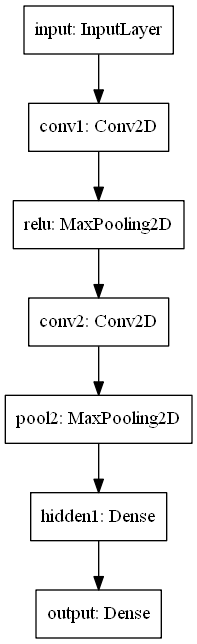

In [33]:
#生成模型网络图，保存，并展示
plot_model(model,to_file='convolutional_neural_network.png')
Image('convolutional_neural_network.png')

## 1.3.3递归神经网络RNN
本例是一个用于分类的长期短记忆的LSTM的递归神经网络
输入：784个时间步骤
单个LSTM隐藏层从序列中提取特征，
全连接层，解释LSTM层的输出
进行10个类别的输出。

In [34]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers.recurrent import LSTM
from keras.utils import plot_model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 784, 1)            0         
_________________________________________________________________
lstm1 (LSTM)                 (None, 128)               66560     
_________________________________________________________________
hidden1 (Dense)              (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 84,362
Trainable params: 84,362
Non-trainable params: 0
_________________________________________________________________


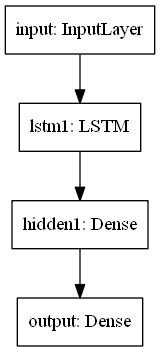

In [43]:
#定义模型结构
mnist_input = Input(shape=(784, 1), name='input')
lstm1 = LSTM(128, name='lstm1')(mnist_input)
hidden1 = Dense(128, activation='relu', name='hidden1')(lstm1)
output = Dense(10, activation='softmax', name='output')(hidden1)
model = Model(inputs=mnist_input, outputs=output)
#打印模型结构
model.summary()
#生成模型图，保存并展示
plot_model(model,to_file='recurrent_neural_network.png')
Image('recurrent_neural_network.png')

### 1.3.4 共享层模型
这种模型中，多个神经层共享一个输出；一个输入层，可以连接多个隐藏层提取数据特征。
#### 1.3.4.1 共享输入层

In [51]:
from keras.models import Model
from keras.layers import Input, Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers.merge import concatenate #合并两个层的输出
from keras.utils import plot_model

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 25, 25, 32)   544         input[0][0]                      
__________________________________________________________________________________________________
conv2 (Conv2D)                  (None, 21, 21, 16)   1040        input[0][0]                      
__________________________________________________________________________________________________
pool1 (MaxPooling2D)            (None, 12, 12, 32)   0           conv1[0][0]                      
__________________________________________________________________________________________________
pool2 (Max

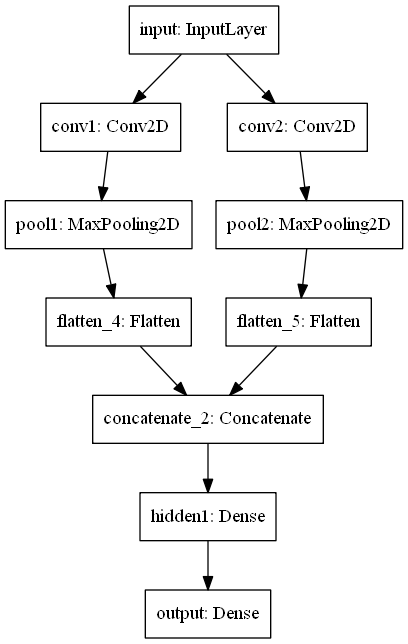

In [50]:
mnist_input = Input(shape=(28,28,1),name='input')

#第一个特征提取层
conv1 = Conv2D(32,kernel_size=4,activation='relu',name='conv1')(mnist_input)
pool1 = MaxPool2D(pool_size=(2,2),name='pool1')(conv1)
flat1 = Flatten()(pool1)

#第二个特征提取层
conv2 = Conv2D(16,kernel_size=8,activation='relu',name='conv2')(mnist_input)
pool2 = MaxPool2D(pool_size=(2,2),name='pool2')(conv2)
flat2 = Flatten()(pool2)

#把两个特征合并起来
merge = concatenate([flat1,flat2])

#全连接层
hidden1 = Dense(64,activation='relu',name='hidden1')(merge)

#输出层
output = Dense(10,activation='softmax',name='output')(hidden1)

#用函数模型，组成神经网络
model = Model(inputs = mnist_input,outputs = output)

#打印模型
model.summary()

#生成网络结构图，保存，并打印
plot_model(model,to_file='shared_input_layer.png')
Image('shared_input_layer.png')

#### 1.3.4.2 共享输出层


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 784, 1)       0                                            
__________________________________________________________________________________________________
lstm1 (LSTM)                    (None, 128)          66560       input[0][0]                      
__________________________________________________________________________________________________
interp21 (Dense)                (None, 64)           8256        lstm1[0][0]                      
__________________________________________________________________________________________________
interp22 (Dense)                (None, 32)           2080        interp21[0][0]                   
__________________________________________________________________________________________________
interp1 (D

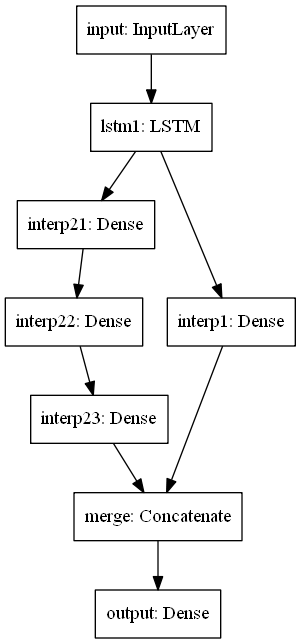

In [53]:
#输入层
mnist_input = Input(shape=(784, 1), name='input')
#特征提取层
extract1 = LSTM(128, name='lstm1')(mnist_input)
#第一个解释层
interp1 = Dense(10, activation='relu', name='interp1')(extract1)
#第二个解释层
interp21 = Dense(64, activation='relu', name='interp21')(extract1)
interp22 = Dense(32, activation='relu', name='interp22')(interp21)
interp23 = Dense(16, activation='relu', name='interp23')(interp22)
#合并两个分析结果
merge = concatenate([interp1, interp23], name='merge')
#输出层
output = Dense(10, activation='softmax', name='output')(merge)
#组合模型
model = Model(inputs=mnist_input, outputs=output)
model.summary()

plot_model(model,to_file='shared_feature_extractor.png')
Image('shared_feature_extractor.png')


### 1.3.5多种输入和输出
#### 1.3.5.1多输入模型

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img_gray_bigsize (InputLayer)   (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
img_rgb_smallsize (InputLayer)  (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv11 (Conv2D)                 (None, 61, 61, 32)   544         img_gray_bigsize[0][0]           
__________________________________________________________________________________________________
conv21 (Conv2D)                 (None, 29, 29, 32)   1568        img_rgb_smallsize[0][0]          
__________________________________________________________________________________________________
pool11 (Ma

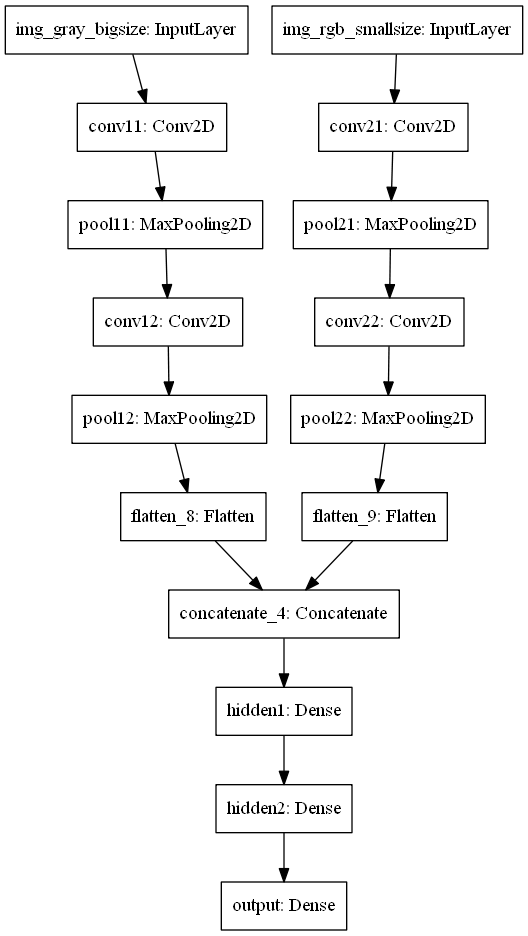

In [55]:
# the first input layers
img_gray_bigsize = Input(shape=(64, 64, 1), name='img_gray_bigsize')
conv11 = Conv2D(32, kernel_size=4, activation='relu', name='conv11')(img_gray_bigsize)
pool11 = MaxPool2D(pool_size=(2, 2), name='pool11')(conv11)
conv12 = Conv2D(16, kernel_size=4, activation='relu', name='conv12')(pool11)
pool12 = MaxPool2D(pool_size=(2, 2), name='pool12')(conv12)
flat1 = Flatten()(pool12)
# the scecond input layers
img_rgb_smallsize = Input(shape=(32, 32, 3), name='img_rgb_smallsize')
conv21 = Conv2D(32, kernel_size=4, activation='relu', name='conv21')(img_rgb_smallsize)
pool21 = MaxPool2D(pool_size=(2, 2), name='pool21')(conv21)
conv22 = Conv2D(16, kernel_size=4, activation='relu', name='conv22')(pool21)
pool22 = MaxPool2D(pool_size=(2, 2), name='pool22')(conv22)
flat2 = Flatten()(pool22)
#connect the two layers
merge = concatenate([flat1, flat2])
#use the hidden layers to explain output
hidden1 = Dense(128, activation='relu', name='hidden1')(merge)
hidden2 = Dense(64, activation='relu', name='hidden2')(hidden1)
#output layer
output = Dense(10, activation='softmax', name='output')(hidden2)
#create the model
model = Model(inputs=[img_gray_bigsize, img_rgb_smallsize], outputs=output)
model.summary()
plot_model(model, to_file='multiple_inputs.png')
Image('multiple_inputs.png')